## Ekstraksi Data ke Dalam Dataframe dari CSV

In [1]:
import pandas as pd
df = pd.read_csv('Dataset of Diabetes .csv')
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


## Eksplorasi Data

In [2]:
print(df.dtypes)

ID             int64
No_Pation      int64
Gender        object
AGE            int64
Urea         float64
Cr             int64
HbA1c        float64
Chol         float64
TG           float64
HDL          float64
LDL          float64
VLDL         float64
BMI          float64
CLASS         object
dtype: object


In [3]:
# Data exploration and preprocessing    
print(df.shape)
print(df.info())


(1000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB
None


In [4]:
print(df.describe())

                ID     No_Pation          AGE         Urea           Cr  \
count  1000.000000  1.000000e+03  1000.000000  1000.000000  1000.000000   
mean    340.500000  2.705514e+05    53.528000     5.124743    68.943000   
std     240.397673  3.380758e+06     8.799241     2.935165    59.984747   
min       1.000000  1.230000e+02    20.000000     0.500000     6.000000   
25%     125.750000  2.406375e+04    51.000000     3.700000    48.000000   
50%     300.500000  3.439550e+04    55.000000     4.600000    60.000000   
75%     550.250000  4.538425e+04    59.000000     5.700000    73.000000   
max     800.000000  7.543566e+07    79.000000    38.900000   800.000000   

             HbA1c         Chol           TG          HDL          LDL  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      8.281160     4.862820     2.349610     1.204750     2.609790   
std       2.534003     1.301738     1.401176     0.660414     1.115102   
min       0.900000     0.000

In [5]:
print(df.isnull().sum())

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64


In [6]:
# Memeriksa duplikasi
print(df.duplicated().sum())

# Memeriksa data yang unique
print(df['CLASS'].unique())
print(df['CLASS'].value_counts())


0
['N' 'N ' 'P' 'Y' 'Y ']
CLASS
Y     840
N     102
P      53
Y       4
N       1
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_36712\564347827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="CLASS", palette="Set2")


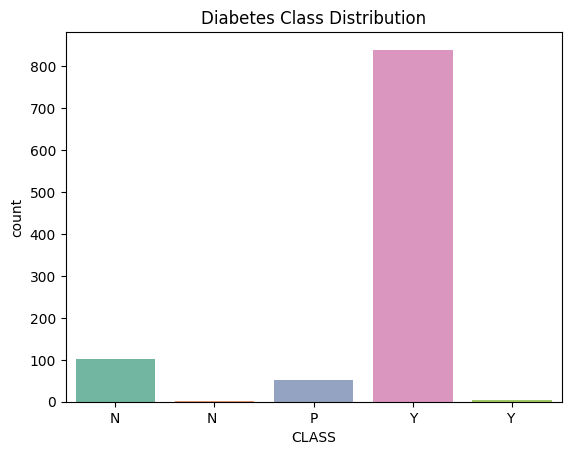

In [7]:
# Visualisasi data berdasarkan class sebelum preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=df, x="CLASS", palette="Set2")
plt.title("Diabetes Class Distribution")
plt.show()


In [8]:
# Menghilangkan spasi di awal/akhir
df['CLASS'] = df['CLASS'].str.strip()

# Memeriksa data yang unique kembali
print(df['CLASS'].unique())
print(df['CLASS'].value_counts())

['N' 'P' 'Y']
CLASS
Y    844
N    103
P     53
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_36712\2621714145.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="CLASS", palette="Set2")


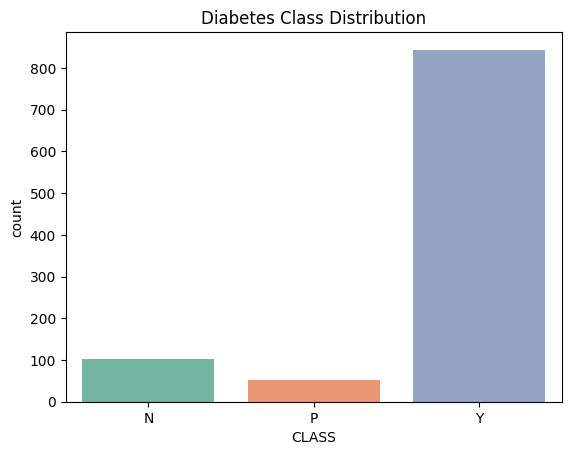

In [9]:
# Visualisasi data berdasarkan class sesudah preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=df, x="CLASS", palette="Set2")
plt.title("Diabetes Class Distribution")
plt.show()


In [10]:
class_counts = df['CLASS'].value_counts(normalize=True)
class_counts

CLASS
Y    0.844
N    0.103
P    0.053
Name: proportion, dtype: float64

Insight #1: Berdasarkan bar chart di atas ini, distribusi data sangat tidak proporsional
- Presentase jumlah data Y 84.4% sementara N 10.3% dan P hanya 5.3% 
 

In [11]:
# Memeriksa data yang unique untuk gender
print(df["Gender"].unique())
# Mengubah data gender menjadi Uppercase
df["Gender"] = df["Gender"].str.upper()
# Memeriksa data yang unique untuk gender setelah mengubah data
print(df["Gender"].unique())

gender_dist = pd.crosstab(df['Gender'], df['CLASS'], normalize='index')
gender_dist

['F' 'M' 'f']
['F' 'M']


CLASS,N,P,Y
Gender,,,
F,0.147126,0.039080,0.813793
M,0.069027,0.063717,0.867257


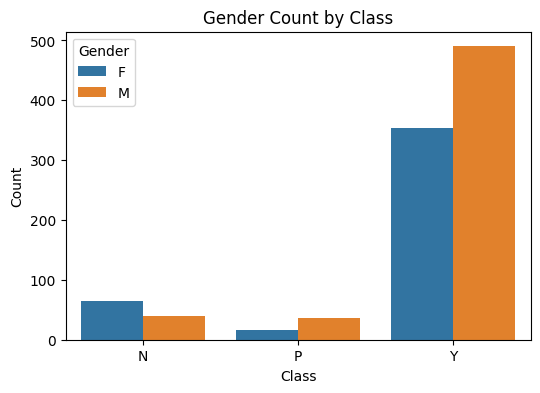

In [12]:
# Visualisasi data berdasarkan class sesudah preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
df2 = df.copy()
plt.figure(figsize=(6,4))
sns.countplot(x="CLASS", hue="Gender", data=df2)

plt.title("Gender Count by Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()


Insight #2: Mayoritas class N adalah Perempuan dan mayoritas pre-diabetes (P) dan pengidap diabetes (Y)

C:\Users\user\AppData\Local\Temp\ipykernel_36712\2517017778.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="CLASS", y="AGE", palette="Set1")


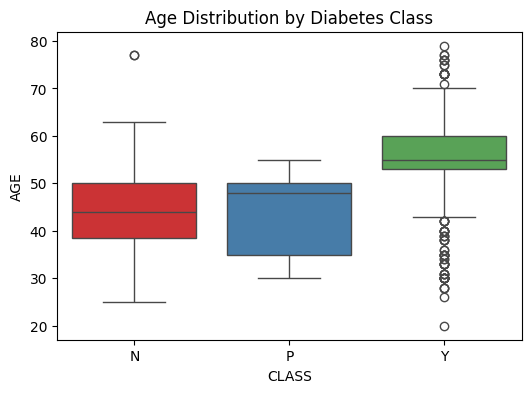

In [13]:
# Visualisasi berdasarkan umur vs status
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="CLASS", y="AGE", palette="Set1")
plt.title("Age Distribution by Diabetes Class")
plt.show()

In [14]:
age_mean = df.groupby('CLASS')['AGE'].mean()
age_mean

CLASS
N    44.233010
P    43.283019
Y    55.305687
Name: AGE, dtype: float64

Insight #3: Rata-rata umur pengidap diabetes berada di kisaran umur ~55 tahun sedangkan pre-diabetes berada di antara ~44 tahun. Umur rata-rata yang non-diabetic lebih rendah dari keduanya, yaitu berada di kisaran umur ~43 tahun. Namun, boxplot di atas terdapat banyak outlier dari Y. Bisa dari data yang sangat banyak yang menyebabkan hal itu terjadi dan juga bisa menjelaskan bahwasanya seseorang dengan umur di bawah 20 tahun bisa mengidap diabetes  

C:\Users\user\AppData\Local\Temp\ipykernel_36712\1938054757.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="CLASS", y="BMI", palette="Set1")


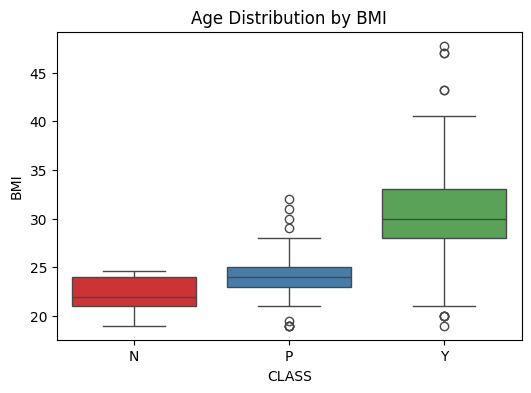

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="CLASS", y="BMI", palette="Set1")
plt.title("Age Distribution by BMI")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_36712\2091627006.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="CLASS", y="HbA1c", palette="Set1")


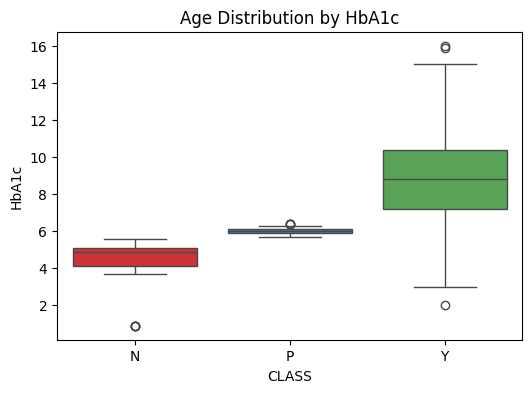

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="CLASS", y="HbA1c", palette="Set1")
plt.title("Age Distribution by HbA1c")
plt.show()

In [17]:
avg_values = df.groupby('CLASS')[['AGE', 'BMI', 'HbA1c', 'Chol']].mean()

(gender_dist, avg_values)



(CLASS          N         P         Y
 Gender                              
 F       0.147126  0.039080  0.813793
 M       0.069027  0.063717  0.867257,
              AGE        BMI     HbA1c      Chol
 CLASS                                          
 N      44.233010  22.374757  4.560194  4.268932
 P      43.283019  23.933962  6.003774  4.579245
 Y      55.305687  30.811517  8.878270  4.953104)

Insight #4: faktor yang significant dalam diabetes adalah BMI dan HbA1c, semakin tinggi angka keduanya maka semakin mungkin seseorang memiliki diabetes

## Transformasi Data dan Splitting Data 

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Transformasi data sebelum modeling
X = df.drop(["ID", "No_Pation", "CLASS"], axis=1)

# Encoding gender
X = pd.get_dummies(X, columns=["Gender"], drop_first=True) 

# Encoding target
en = LabelEncoder()
y = en.fit_transform(df['CLASS'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=33
)



In [19]:
# Jumlah data untuk training dan testing
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 11)
(200, 11)
(800,)
(200,)


## Normalisasi Data

In [20]:
from sklearn.preprocessing import StandardScaler
# Scaling data untuk modeling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modeling 

In [21]:
from sklearn.ensemble import RandomForestClassifier
# Model training menggunakan random forest
model = RandomForestClassifier(
    n_estimators=200,   # jumlah tree
    max_depth=None,     # tidak ada limit agar tree bisa mengembang hingga bawah, karena dataset kecil maka tidak perlu khawatir untuk eksekusi yang lambat
    random_state=33,
    class_weight="balanced"  
)

model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=33)

## Evaluasi Model

In [22]:
# Evalusasi model 
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=en.classes_))

Confusion Matrix:
[[ 15   0   1]
 [  0   8   1]
 [  2   0 173]]

Classification Report:
              precision    recall  f1-score   support

           N       0.88      0.94      0.91        16
           P       1.00      0.89      0.94         9
           Y       0.99      0.99      0.99       175

    accuracy                           0.98       200
   macro avg       0.96      0.94      0.95       200
weighted avg       0.98      0.98      0.98       200



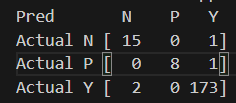

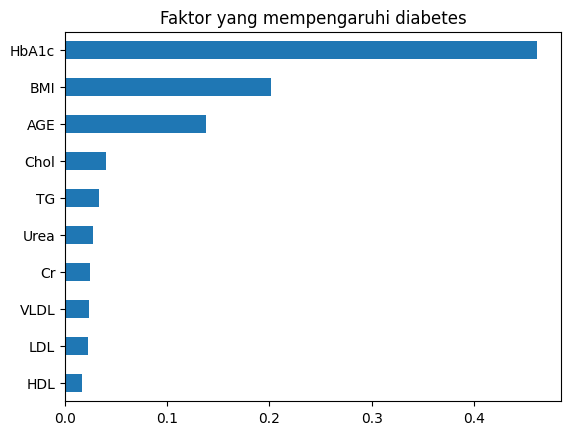

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).sort_values().plot(kind="barh")
plt.title("Faktor yang mempengaruhi diabetes")
plt.show()

Insight #5: Berdasarkan rangking di atas, faktor yang paling mempengaruhi seseorang dapat mengidap diabetes adalah HbA1c yang kemudian diikuti dengan BMI dan umur

## Kesimpulan

Dari angka di atas, akurasi dalam penggunaan model Random Forest dalam dataset ini adalah sekitar 98% pada weighted average dan 95% pada macro average. Model ini berhasil memprediksi 15/16 benar untuk data N, kemudian untuk P 8/9 data, dan untuk pengidap diabetes (Y) sekitar 173/175

Saya menggunakan Random Forest disebabkan ini merupakan case dari classification banyaknya outliers dari data Y, Random Forest dapat menangani outliers dengan sangat baik, Dataset ini merupakan dataset yang kecil, Dan risiko overfitting pada Random Forest yang kecil.